Network X Code goes here, now we convert it into a graph

# Parameters


In [347]:
#Parameters:
NoOfUsers = 30
cloud_server_cost = 1000 #($/per server/hour)
edge_server_cost = 100   #($/per server/hour)
propagation_delay_constant = 1.5  # in ms/km
routing_cost = 0.09 #($/GB)

# Initialize Network from XML

Debug: Added Node N1 - x: 237.0, y: 338.0
Debug: Added Node N2 - x: 130.0, y: 207.0
Debug: Added Node N3 - x: 126.0, y: 531.0
Debug: Added Node N4 - x: 209.0, y: 523.0
Debug: Added Node N5 - x: 345.0, y: 232.0
Debug: Added Node N6 - x: 95.0, y: 350.0
Debug: Added Node N7 - x: 302.0, y: 404.0
Debug: Added Node N8 - x: 161.0, y: 454.0
Debug: Added Node N9 - x: 394.0, y: 499.0
Debug: Added Node N10 - x: 389.0, y: 656.0
Debug: Added Node N11 - x: 237.0, y: 645.0
Debug: Added Node N12 - x: 277.0, y: 70.0
Debug: Added Node N13 - x: 540.0, y: 147.0
Debug: Added Node N14 - x: 592.0, y: 503.0
Debug: Added Node N15 - x: 490.0, y: 349.0
Debug: Added Node N16 - x: 463.0, y: 543.0
Debug: Added Node OhioCloud - x: -400.1383141847919, y: -830.0059209290719
Debug: Added Node OregonCloud - x: -430.8275515896039, y: -120.55721609633432
Debug: Processing link 1 - Source: N1, Destination: N2
Link ID: 1, Source: N1, Destination: N2, Capacity: 1000.0, Cost: 44400.0
Debug: Processing link 2 - Source: N1, Des

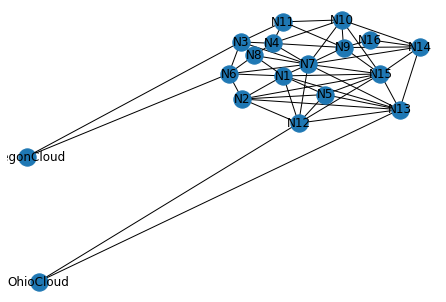

In [348]:

# Importing required libraries
import random
import networkx as nx   # for creating and manipulating graphs
import matplotlib.pyplot as plt   # for visualizing graphs

# Importing required functions
import PerformanceAnalysis.MeasureStatistics as MeasureStatistics  # to measure network statistics
import SearchAlgos.PageRank as  PageRank  # to compute node rankings based on pagerank

# Importing a user-defined function to read network data from XML file
from Import_NetworkFromXML_backup import *



# Defining a function to convert nodes in the XML network dictionary to nodes in networkx graph
def convert_nodes(G, nodes):
    for node in nodes:
        node_id = nodes[node].get("id")
        x_cor = nodes[node].get("x_cor")
        y_cor = nodes[node].get("y_cor")
        G.add_node(node_id, pos=(x_cor, y_cor))
        print(f"Debug: Added Node {node_id} - x: {x_cor}, y: {y_cor}")  # Debug print



#Function to convert links in the XML network dictionary to edges in NetworkX graph

def convert_links(G, nodes, links):
    for link_id, link in enumerate(links.keys(), 1):
        source = links[link].get("source")
        dest = links[link].get("destination")
        
        print(f"Debug: Processing link {link_id} - Source: {source}, Destination: {dest}")  # Debug print

        additionalModules = links[link].get('additionalModules')
        
        if additionalModules:
            addModule = additionalModules.get('addModule')
            if addModule:
                capacity = addModule.get("capacity")
                cost = addModule.get("cost")
                G.add_edge(source, dest, capacity=float(capacity), cost=float(cost))
                print(f"Link ID: {link_id}, Source: {source}, Destination: {dest}, Capacity: {capacity}, Cost: {cost}")
            else:
                print(f"Link ID: {link_id} has no 'addModule' in 'additionalModules'.")
        else:
            print(f"Link ID: {link_id} has no additional modules.")

# Defining the name of the network and creating an empty networkx graph
network_name = "newyork.xml"
G = nx.Graph()

# Defining the path to the network XML file and reading the network data from the file
path = 'Networks/'
from_xml = read_XMLnetwork (path+network_name)

# Extracting nodes, links, and demands data from the network data dictionary
nodes = from_xml[0]
links = from_xml[1]


# Converting nodes and links data to nodes and edges in networkx graph
convert_nodes(G,nodes)
convert_links(G,nodes,links)


# Drawing the networkx graph with node positions and other attributes
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=300, style = "solid")

import matplotlib.pyplot as plt
import networkx as nx

# Draw the graph
#fig, ax = plt.subplots(figsize=(10, 10))  # you can change the figure size as needed

# # Set axis limits
# ax.set_xlim([-500, 500])  # Adjust limits to fit your specific case
# ax.set_ylim([-1000, 1000])

# nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=300, ax=ax)

# plt.show()


print(G)






In [349]:
def print_link_costs(G):
    for source, dest, attributes in G.edges(data=True):
        cost = attributes.get('cost', 'N/A')  # Retrieves the cost attribute, returns 'N/A' if not found
        print(f"Link from {source} to {dest} has a cost of {cost}")

print_link_costs(G)


Link from N1 to N2 has a cost of 44400.0
Link from N1 to N5 has a cost of 59600.0
Link from N1 to N6 has a cost of 59600.0
Link from N1 to N7 has a cost of 74800.0
Link from N1 to N8 has a cost of 74800.0
Link from N1 to N12 has a cost of 74800.0
Link from N1 to N13 has a cost of 105200.0
Link from N1 to N15 has a cost of 90000.0
Link from N2 to N5 has a cost of 29200.0
Link from N2 to N6 has a cost of 59600.0
Link from N2 to N12 has a cost of 74800.0
Link from N2 to N13 has a cost of 105200.0
Link from N2 to N15 has a cost of 105200.0
Link from N3 to N4 has a cost of 59600.0
Link from N3 to N6 has a cost of 59600.0
Link from N3 to N7 has a cost of 59600.0
Link from N3 to N8 has a cost of 29200.0
Link from N3 to N11 has a cost of 74800.0
Link from N3 to OregonCloud has a cost of 226800.0
Link from N4 to N7 has a cost of 74800.0
Link from N4 to N8 has a cost of 59600.0
Link from N4 to N9 has a cost of 105200.0
Link from N4 to N10 has a cost of 90000.0
Link from N4 to N11 has a cost of 2

# Measure Infrastructure Statistics

In [350]:
# Calculating shortest paths between all pairs of nodes in the networkx graph
sp = dict(nx.all_pairs_shortest_path(G))

# calling the measure_statistics function and passing the networkx graph G as a parameter
MeasureStatistics.topology_statistics(G)

# calling the assortativity_measure function and passing the networkx graph G as a parameter
MeasureStatistics.assortativity_measure(G)

pagerank_df = PageRank.compute_pagerank(G)
print("Page Rank Weights")
print(pagerank_df)

Topology Stats:
Density: 0.3464052287581699
Avg. shortest path length: 1.8823529411764706
Avg. clustering coefficient: 0.6791446208112875
Assortativity 0.012805587892899862

Assortativity Stats:
18
0.3281733746130031
Erdos-Renyi assortativity: -0.010666482513882372 0.11991580173118106
Conf. model assortativity: -0.014131131220088522 0.16520671090798822
Real network value: 0.012805587892899862

Page Rank Weights
           name     value
6            N7  0.095813
14          N15  0.078552
12          N13  0.072393
0            N1  0.070751
8            N9  0.066395
11          N12  0.064178
2            N3  0.059555
5            N6  0.058272
13          N14  0.057273
3            N4  0.057031
9           N10  0.056094
1            N2  0.054920
7            N8  0.048026
4            N5  0.046534
10          N11  0.040859
17  OregonCloud  0.025026
15          N16  0.024509
16    OhioCloud  0.023818


# Approximations and Heuristics
Approximations of graph properties and Heuristic methods for optimization.

# import
These functions can be accessed using networkx.approximation.function_name

They can be imported using from networkx.algorithms import approximation or from networkx.algorithms.approximation import function_name

# Treewidth
Functions for computing treewidth decomposition.

Treewidth of an undirected graph is a number associated with the graph. It can be defined as the size of the largest vertex set (bag) in a tree decomposition of the graph minus one.

Wikipedia: Treewidth

treewidth_min_degree(G): Returns a treewidth decomposition using the Minimum Degree heuristic.

## To Implement:
1. Generate Users: Randomly distrubuted users generated with uniform random distrubution of (x,y) corrdinates around the graph G that represents infrastrcuture. Allow options (ex. User_Spread).
2. Connect each user to nearest AP: Allow options (ex. SNR, Connected_Users, Access_Technology).
3. Generate demand for each user: Assign User -> Application (Define SFCn = {VNF1 + VNF2 + .... + VNFx}).
4. Create Placement Algorithm for each Placement Solution.
5. Create a Next Candidate Search Algorithm: Takes as an input (G, Users, Demamds).
6. Measure network statistics for each Placement Algorithm.
7. Generate logs for each Placement Algorithm.
8. Save logs in an output file.
9. Create function to plot from the logs.

## Generate Users
Here we will generate users

Generate Users: Randomly distrubuted users generated with uniform random distrubution of (x,y) corrdinates around the graph G that represents infrastrcuture. 

Allow options (ex. User_Spread).

Nearest AP for user at (256, 346): N1 (Distance: 20.615528128088304)
Nearest AP for user at (256, 346): N1 (Distance: 20.615528128088304)
Nearest AP for user at (129, 223): N2 (Distance: 16.0312195418814)
Nearest AP for user at (129, 223): N2 (Distance: 16.0312195418814)
Nearest AP for user at (159, 565): N3 (Distance: 47.38143096192854)
Nearest AP for user at (159, 565): N3 (Distance: 47.38143096192854)
Nearest AP for user at (213, 528): N4 (Distance: 6.4031242374328485)
Nearest AP for user at (213, 528): N4 (Distance: 6.4031242374328485)
Nearest AP for user at (383, 259): N5 (Distance: 46.61544808322666)
Nearest AP for user at (383, 259): N5 (Distance: 46.61544808322666)
Nearest AP for user at (71, 376): N6 (Distance: 35.38361202590826)
Nearest AP for user at (71, 376): N6 (Distance: 35.38361202590826)
Nearest AP for user at (308, 357): N7 (Distance: 47.38143096192854)
Nearest AP for user at (308, 357): N7 (Distance: 47.38143096192854)
Nearest AP for user at (195, 477): N8 (Distance:

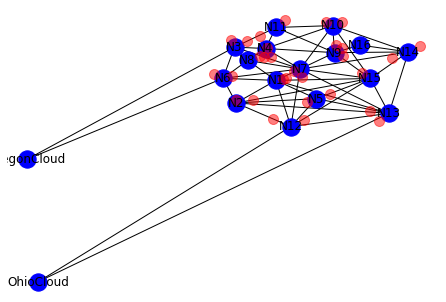

User to Node Association:
user_0 is associated with N1
user_1 is associated with N2
user_2 is associated with N3
user_3 is associated with N4
user_4 is associated with N5
user_5 is associated with N6
user_6 is associated with N7
user_7 is associated with N8
user_8 is associated with N9
user_9 is associated with N10
user_10 is associated with N11
user_11 is associated with N12
user_12 is associated with N13
user_13 is associated with N14
user_14 is associated with N15
user_15 is associated with N9
user_16 is associated with N1
user_17 is associated with N2
user_18 is associated with N3
user_19 is associated with N4
user_20 is associated with N5
user_21 is associated with N6
user_22 is associated with N7
user_23 is associated with N4
user_24 is associated with N9
user_25 is associated with N10
user_26 is associated with N11
user_27 is associated with N12
user_28 is associated with N13
user_29 is associated with N14


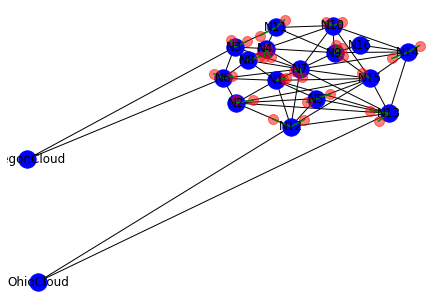

In [351]:
#users

# (1) Create a new graph, G_users, to represent the users.
#G_users = nx.Graph()

from scipy.spatial.distance import euclidean
import random
import networkx as nx
import matplotlib.pyplot as plt

# ... (other functions you've already defined) ...

# Function to find the nearest AP for a given user position
# def find_nearest_ap(G, user_pos):
#     min_distance = float('inf')
#     nearest_ap = None
#     nearest_pos = None

#     for ap, pos in nx.get_node_attributes(G, 'pos').items():
#         distance = euclidean(user_pos, pos)
#         if distance < min_distance:
#             min_distance = distance
#             nearest_ap = ap
#             nearest_pos = pos

#     return nearest_ap, nearest_pos

def find_nearest_ap(G, user_pos):
    min_distance = float('inf')
    nearest_ap = None
    nearest_pos = None

    for ap, pos in nx.get_node_attributes(G, 'pos').items():
        distance = euclidean(user_pos, pos)
        if distance < min_distance:
            min_distance = distance
            nearest_ap = ap
            nearest_pos = pos

    # Debug print to check the nearest AP found
    print(f"Nearest AP for user at {user_pos}: {nearest_ap} (Distance: {min_distance})")

    return nearest_ap, nearest_pos




def create_users(G, G_users, nodes, NoOfUsers):
    user_connections = []
    user_count = 0
    user_to_node_map = {}  # Dictionary to store user_id to node_id association

    while user_count < NoOfUsers:
        for node in nodes:
            node_id = nodes[node].get("id")
            if not "Cloud" in node_id:
                x_cor = nodes[node].get("x_cor")
                y_cor = nodes[node].get("y_cor")
                # randx = int(random.uniform(x_cor - 2.5, x_cor + 2.5))
                # randy = int(random.uniform(y_cor - 2.5, y_cor + 2.5))
                randx = int(random.uniform(x_cor - 50, x_cor + 50))
                randy = int(random.uniform(y_cor - 50, y_cor + 50))

                user_pos = (randx, randy)
                nearest_ap, nearest_pos = find_nearest_ap(G, user_pos)

                user_id = "user_" + str(user_count)
                G_users.add_node(user_id, pos=user_pos)
                nearest_ap, nearest_pos = find_nearest_ap(G, user_pos)

                if nearest_ap is None:
                    print(f"No AP found for user {user_id} at position {user_pos}")
                    continue  # Skip this user or handle the case when no AP is found

                user_connections.append((user_pos, nearest_pos))
                user_to_node_map[user_id] = nearest_ap

                #user_id = "user_" + str(user_count)
                #G_users.add_node(user_id, pos=user_pos)
                #user_connections.append((user_pos, nearest_pos))

                # Store the association in the dictionary
                #user_to_node_map[user_id] = nearest_ap

                user_count += 1
                if user_count >= NoOfUsers:
                    break

    return user_connections, user_to_node_map


# (5) Call the create_users function with the desired number of users


G_users = nx.Graph()



user_connections, user_to_node_map = create_users(G, G_users, nodes, NoOfUsers)

# Draw the original graph G and the graph of users G_users together
pos_G = nx.get_node_attributes(G, 'pos')
pos_G_users = nx.get_node_attributes(G_users, 'pos')

nx.draw(G, pos_G, with_labels=True, node_size=300, style="solid", node_color="blue")
nx.draw(G_users, pos_G_users, with_labels=False, node_size=100, style="dashed", node_color="red", alpha=0.5)

plt.show()



# Updated create_users function to track user connections


# (rest of the existing code)

# ...
# Create a new graph for users and call create_users


# Print the user_id to node_id association
print("User to Node Association:")
for user_id, node_id in user_to_node_map.items():
    print(f"{user_id} is associated with {node_id}")
    # Add the 'associated_ap' attribute to each user node
    G_users.nodes[user_id]['associated_ap'] = node_id

users_ap = {}
for user_id in G_users:
    # Get the associated AP from the user node attributes
    associated_ap = G_users.nodes[user_id].get('associated_ap')

    # Check if the AP is valid (not None) before adding to the dictionary
    if associated_ap:
        users_ap[user_id] = {associated_ap: 1}
    else:
        print(f"No AP associated with {user_id}, skipping...")


# Draw the graphs and user connections
pos_G = nx.get_node_attributes(G, 'pos')
pos_G_users = nx.get_node_attributes(G_users, 'pos')

nx.draw(G, pos_G, with_labels=True, node_size=300, style="solid", node_color="blue")
nx.draw(G_users, pos_G_users, with_labels=False, node_size=100, style="dashed", node_color="red", alpha=0.5)

# Draw the connections between users and APs
for user_pos, ap_pos in user_connections:
    plt.plot([user_pos[0], ap_pos[0]], [user_pos[1], ap_pos[1]], color="green", linestyle="-")

plt.show()




# Compute Latency on all Links

In [352]:
import math

# Dictionary to store propagation delays
propagation_delays = {}

# Define a function to calculate the distance between two nodes based on their x, y coordinates
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Define a function to compute and set the propagation delay for each link in the graph
def compute_propagation_delay(G):
    for (u, v, d) in G.edges(data=True):
        x1, y1 = G.nodes[u]['pos']
        x2, y2 = G.nodes[v]['pos']
        
        distance = calculate_distance(x1, y1, x2, y2)
        latency = distance * propagation_delay_constant
        
        G[u][v]['latency'] = latency  # Adding the latency attribute to the edge

        # Save this latency to the dictionary
        propagation_delays[(u, v)] = latency
        
        print(f"Link ({u}, {v}) - Distance: {distance}, Latency: {latency} ms")

# Call the function after the graph has been fully created
compute_propagation_delay(G)

# Debug print to verify using the dictionary
for (u, v), latency in propagation_delays.items():
    print(f"Link ({u}, {v}) - Latency: {latency} ms")



Link (N1, N2) - Distance: 169.14490828872147, Latency: 253.7173624330822 ms
Link (N1, N5) - Distance: 151.32745950421557, Latency: 226.99118925632337 ms
Link (N1, N6) - Distance: 142.50614021858848, Latency: 213.75921032788273 ms
Link (N1, N7) - Distance: 92.63368717696602, Latency: 138.95053076544903 ms
Link (N1, N8) - Distance: 138.67948658687772, Latency: 208.01922988031657 ms
Link (N1, N12) - Distance: 270.9686328710392, Latency: 406.45294930655876 ms
Link (N1, N13) - Distance: 358.1759344232943, Latency: 537.2639016349415 ms
Link (N1, N15) - Distance: 253.23901753086943, Latency: 379.85852629630415 ms
Link (N2, N5) - Distance: 216.44860821913363, Latency: 324.6729123287005 ms
Link (N2, N6) - Distance: 147.220922426128, Latency: 220.83138363919198 ms
Link (N2, N12) - Distance: 200.94277792446286, Latency: 301.41416688669426 ms
Link (N2, N13) - Distance: 414.36698710201324, Latency: 621.5504806530198 ms
Link (N2, N15) - Distance: 386.99353999776275, Latency: 580.4903099966441 ms
Lin

# Add Edge Device Attributes


In [353]:
# # (1) Import the json module
# import json

# # (2) Load the JSON data from the EdgeDevices.json file
# with open("Devices/EdgeDevices.json", "r") as file:
#     edge_devices_data = json.load(file)

# # (3) Create a function to associate edge devices with their attributes
# def associate_edge_devices(G, edge_devices_data):
#     edge_devices = edge_devices_data["edgeDevices"]
#     edge_servers = edge_devices_data["edgeServers"]

#     for node in G.nodes():
#         device = random.choice(edge_devices + edge_servers)
#         G.nodes[node]["name"] = device["name"]
#         G.nodes[node]["formFactor"] = device["formFactor"]
#         G.nodes[node]["architecture"] = device["architecture"]
#         G.nodes[node]["cpu"] = device["cpu"]
#         G.nodes[node]["memory"] = device["memory"]
#         G.nodes[node]["storage"] = device["storage"]
#         G.nodes[node]["source"] = device["source"]

# # (4) Call the function to update the attributes of the edge devices in the graph
# associate_edge_devices(G, edge_devices_data)


# # (4) Call the function to update the attributes of the edge devices in the graph
# associate_edge_devices(G, edge_devices_data)

# #Debug to print
# for node, attrs in G.nodes(data=True):
#     print(f"Node: {node}")
#     for attr_key, attr_value in attrs.items():
#         print(f"  {attr_key}: {attr_value}")
#     print()


# Assign Server Properties to each node in a uniform manner


In [354]:
# (1) Import the json module
import json

# (2) Load the JSON data from the EdgeDevices.json file
with open("Devices/EdgeDevices.json", "r") as file:
    edge_devices_data = json.load(file)

# Function to associate edge devices with their attributes
def associate_edge_devices(G, edge_devices_data):
    for node in G.nodes():
        # Check if the node name contains "cloud"
        if "cloud" in node.lower():
            print(node.lower())
            G.nodes[node]["name"] = "Huawei FusionServer Pro 2298 V5"
            G.nodes[node]["formFactor"] = 34253
            G.nodes[node]["architecture"] = "x86"
            G.nodes[node]["cpu"] = "75.6GHz"
            G.nodes[node]["memory"] = "3TB"
            G.nodes[node]["storage"] = "450TB"
            G.nodes[node]["source"] = "Edge_Device_FusionServerPro2298"
            G.nodes[node]["server_cost"] = cloud_server_cost
        else:
            # Assign Cisco HyperFlex HX220c Edge M5 attributes
            G.nodes[node]["name"] = "Cisco HyperFlex HX220c Edge M5"
            G.nodes[node]["formFactor"] = 16408
            G.nodes[node]["architecture"] = "x86"
            G.nodes[node]["cpu"] = "34.8GHz"
            G.nodes[node]["memory"] = "1TB"
            G.nodes[node]["storage"] = "5TB"
            G.nodes[node]["source"] = "Edge_Device_Cisco_HX220"
            G.nodes[node]["server_cost"] = edge_server_cost


                

# (4) Call the function to update the attributes of the edge devices in the graph
associate_edge_devices(G, edge_devices_data)


# Call the function to update the attributes of the edge devices in the graph
#associate_edge_devices(G)

# Debug to print
for node, attrs in G.nodes(data=True):
    print(f"Node: {node}")
    for attr_key, attr_value in attrs.items():
        print(f"  {attr_key}: {attr_value}")
    print()


ohiocloud
oregoncloud
Node: N1
  pos: (237.0, 338.0)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: 34.8GHz
  memory: 1TB
  storage: 5TB
  source: Edge_Device_Cisco_HX220
  server_cost: 100

Node: N2
  pos: (130.0, 207.0)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: 34.8GHz
  memory: 1TB
  storage: 5TB
  source: Edge_Device_Cisco_HX220
  server_cost: 100

Node: N3
  pos: (126.0, 531.0)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: 34.8GHz
  memory: 1TB
  storage: 5TB
  source: Edge_Device_Cisco_HX220
  server_cost: 100

Node: N4
  pos: (209.0, 523.0)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: 34.8GHz
  memory: 1TB
  storage: 5TB
  source: Edge_Device_Cisco_HX220
  server_cost: 100

Node: N5
  pos: (345.0, 232.0)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: 34.8GHz
  memory: 1TB
  stora

# Assign Applications to users randomly to generate demand:



In [355]:
import json

# Function to associate user devices with their attributes
def associate_user_devices(G_users, traffic_json_path):
    # Load the JSON data from the Traffic.json file
    with open(traffic_json_path, "r") as file:
        traffic_data = json.load(file)
        
    traffic_statistics = traffic_data["trafficStatistics"]
    
    for user in G_users.nodes():
        random_stat = random.choice(traffic_statistics)
        
        G_users.nodes[user]["application"] = random_stat["application"]
        G_users.nodes[user]["bandwidth"] = sum(random_stat["bandwidth"]) / len(random_stat["bandwidth"])
        
        if isinstance(random_stat["latency"], list):
            G_users.nodes[user]["latency"] = sum(random_stat["latency"]) / len(random_stat["latency"])
        else:
            G_users.nodes[user]["latency"] = random_stat["latency"]
            
        G_users.nodes[user]["deviceDensity"] = random_stat["deviceDensity"]
        G_users.nodes[user]["source"] = random_stat["source"]

# Specify the path to Traffic.json
traffic_json_path = "Devices/Traffic.json"

# Call the function to update the attributes of the user devices in the graph
associate_user_devices(G_users, traffic_json_path)

# Debug to print
for node, attrs in G_users.nodes(data=True):
    print(f"Node: {node}")
    for attr_key, attr_value in attrs.items():
        if attr_key == "bandwidth":
            print(f"  {attr_key}: {attr_value} Mbps")
        elif attr_key == "latency":
            print(f"  {attr_key}: {attr_value} ms")
        elif attr_key == "deviceDensity":
            print(f"  {attr_key}: {attr_value} /km^2")
        else:
            print(f"  {attr_key}: {attr_value}")
    print()



Node: user_0
  pos: (256, 346)
  associated_ap: N1
  application: Remote Monitoring
  bandwidth: 5.0 Mbps
  latency: 250 ms
  deviceDensity: 60000 /km^2
  source: Cisotto2019

Node: user_1
  pos: (129, 223)
  associated_ap: N2
  application: Smart Grids
  bandwidth: 0.7505 Mbps
  latency: 10.5 ms
  deviceDensity: 6000 /km^2
  source: Schulz

Node: user_2
  pos: (159, 565)
  associated_ap: N3
  application: Home Energy
  bandwidth: 0.0505 Mbps
  latency: 250.0 ms
  deviceDensity: 6000 /km^2
  source: Gungor

Node: user_3
  pos: (213, 528)
  associated_ap: N4
  application: Connected Ambulance
  bandwidth: 1000.0 Mbps
  latency: 10 ms
  deviceDensity: 60 /km^2
  source: Cisotto2019

Node: user_4
  pos: (383, 259)
  associated_ap: N5
  application: Home Energy
  bandwidth: 0.0505 Mbps
  latency: 250.0 ms
  deviceDensity: 6000 /km^2
  source: Gungor

Node: user_5
  pos: (71, 376)
  associated_ap: N6
  application: Autonomous Traffic
  bandwidth: 5.025 Mbps
  latency: 10 ms
  deviceDensity:

# Assign each application and its users to Containers (VNFs + Microservices)

In [356]:
import json
import networkx as nx

# Function to associate each application with its corresponding containers
def associate_app_with_containers(G_users, containers_json_path):
    # Load the JSON data from the containers.json file
    with open(containers_json_path, 'r') as f:
        containers_data = json.load(f)
        
    # Initialize dictionary to hold application-to-user mapping
    app_to_users = {}
    
    # Loop through each user and get their application
    for user, attrs in G_users.nodes(data=True):
        app = attrs['application']
        if app not in app_to_users:
            app_to_users[app] = []
        app_to_users[app].append(user)
    
    # Loop through each application in containers.json and associate with users
    for app_data in containers_data['Containers']:
        app_name = app_data['application']
        users = app_to_users.get(app_name, [])
        
        # If there are users associated with this app
        if users:
            print(f"Application: {app_name}")
            print("Users associated:", users)
            
            # Print containers in service chain order
            containers = app_data['vnfs'] + app_data['microservices']
            print("Containers to be used in order:", [c['name'] for c in containers])
            
            # Calculate and print total resource requirements
            total_cpu = sum(float(c['cpu']) for c in containers)
            total_mem = sum(float(c['memory']) for c in containers)
            total_storage = sum(float(c['storage']) for c in containers)
            
            print(f"Total CPU requirements: {total_cpu} GHz")
            print(f"Total Memory requirements: {total_mem} GB")
            print(f"Total Storage requirements: {total_storage} GB")
            print("---------------------------------------------------")
    return app_to_users, containers_data

# Specify the path to containers.json
containers_json_path = 'Devices/containers.json'

# Call the function
#associate_app_with_containers(G_users, containers_json_path)

app_to_users, containers_data = associate_app_with_containers(G_users, containers_json_path)




Application: Autonomous Traffic
Users associated: ['user_5', 'user_6', 'user_7', 'user_18', 'user_20', 'user_23', 'user_28']
Containers to be used in order: ['Traffic Management', 'Data Analytics', 'Traffic Routing', 'Vehicle Tracking', 'Traffic Light Control', 'Emergency Vehicle Priority']
Total CPU requirements: 10.0 GHz
Total Memory requirements: 21.0 GB
Total Storage requirements: 21.0 GB
---------------------------------------------------
Application: Road Safety
Users associated: ['user_21', 'user_22', 'user_29']
Containers to be used in order: ['Accident Detection', 'Emergency Alert', 'Safety Protocol', 'Alert Notification']
Total CPU requirements: 4.5 GHz
Total Memory requirements: 6.5 GB
Total Storage requirements: 7.5 GB
---------------------------------------------------
Application: City Surveillance
Users associated: ['user_24']
Containers to be used in order: ['Video Analytics', 'Data Storage', 'Face Recognition', 'License Plate Recognition']
Total CPU requirements: 11.0 

# Random Microservice Placement + Routing

In [357]:
from collections import defaultdict
import random
import networkx as nx

# Initialize data structures to hold server and link states
server_utilization_random = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})
link_utilization_random = defaultdict(float)
accepted_users_count_random = 0
rejected_users_count_random = 0
total_routing_cost_random = 0.0
link_cost_random = defaultdict(float)  # New dictionary to store the cost of each link
total_propagation_delay_random = 0.0  # Initialize variable to hold total propagation delay
# Initialize additional counters
total_edge_servers_used_random = 0
total_cloud_servers_used_random = 0
total_cost_random = 0




# Function to convert string capacity to float (e.g., '3TB' to 3000.0)
def convert_capacity_to_float(capacity_str):
    if 'GHz' in capacity_str:
        return float(capacity_str.replace('GHz', ''))
    elif 'x' in capacity_str:
        # Assuming the format is 'cores x speed' and you want total GHz
        cores, speed = capacity_str.split('x')
        return float(cores) * float(speed)
    elif 'TB' in capacity_str:
        return float(capacity_str.replace('TB', '')) * 1000  # Convert TB to GB
    else:
        return float(capacity_str)


# Function to find a path that can handle the given bandwidth
def find_feasible_path(G, source, target, bandwidth):
    for path in nx.all_simple_paths(G, source=source, target=target, cutoff=10):  # cutoff is optional, for performance
        can_use_path = True
        for i in range(len(path) - 1):
            link = (path[i], path[i + 1])
            link_capacity = G[path[i]][path[i + 1]]['capacity']  # Assuming capacity is in Mbps
            if link_utilization_random[link] + bandwidth > link_capacity:
                can_use_path = False
                break
        if can_use_path:
            return path
    return None


accepted_users_count_random = 0
rejected_users_count_random = 0

# Random Microservice Placement
for app_name, users in app_to_users.items():
    # Select a random server (node) for this application
    server = random.choice(list(G.nodes()))
    
    # Get the total resource requirements for this application
    container_list = [c for c in containers_data['Containers'] if c['application'] == app_name]
    if container_list:
        containers = container_list[0]
    else:
        print(f"No containers found for the application {app_name}")
        continue  # or handle this case appropriately

    total_cpu = sum(float(c['cpu']) for c in containers['vnfs'] + containers['microservices'])
    total_mem = sum(float(c['memory']) for c in containers['vnfs'] + containers['microservices'])
    total_storage = sum(float(c['storage']) for c in containers['vnfs'] + containers['microservices'])
    
    # Check server capacity and update server utilization
    server_capacity = G.nodes[server]
    if server_utilization_random[server]['cpu'] + total_cpu <= convert_capacity_to_float(server_capacity['cpu']) and \
        server_utilization_random[server]['memory'] + total_mem <= convert_capacity_to_float(server_capacity['memory']) and \
        server_utilization_random[server]['storage'] + total_storage <= convert_capacity_to_float(server_capacity['storage']):
        server_utilization_random[server]['cpu'] += total_cpu
        server_utilization_random[server]['memory'] += total_mem
        server_utilization_random[server]['storage'] += total_storage
        # Check if the server is an edge or cloud server and update the counter
        if "cloud" in server.lower():
            total_cloud_servers_used_random += 1
        else:
            total_edge_servers_used_random += 1
    else:
        print(f"Server capacity exceeded for server {server}")
        continue

    # Routing and link utilization
    for user in users:
        source_node = user_to_node_map[user]
        bandwidth = G_users.nodes[user]['bandwidth']
        path = find_feasible_path(G, source=source_node, target=server, bandwidth=bandwidth)
        
        if path:
            # Update link utilization and total routing cost along this path
            # for i in range(len(path) - 1):
            #     link = (path[i], path[i + 1])
            #     link_utilization_random[link] += bandwidth
            #     total_routing_cost_random += G[path[i]][path[i + 1]]['cost']
            #     accepted_users_count_random += 1
            # Update link utilization and total routing cost along this path
            user_propagation_delay = 0.0  # Initialize the user's total propagation delay to zero
            for i in range(len(path) - 1):
                link = (path[i], path[i + 1])
                link_utilization_random[link] += bandwidth
                link_cost = bandwidth * 1e-3 * routing_cost
                #link_cost = bandwidth * 1e-3 * G[path[i]][path[i + 1]]['cost']  # bandwidth in Gbps * cost ($/Gb)
                link_cost_random[link] += link_cost  # Accumulate cost for this link
                #total_routing_cost_random += G[path[i]][path[i + 1]]['cost']
                total_routing_cost_random += link_cost  # Update the total routing cost

                # Add up the propagation delay for the current link to the user's total
                user_propagation_delay += propagation_delays.get(link, 0)
                accepted_users_count_random += 1
             # Add this user's propagation delay to the total
            total_propagation_delay_random += user_propagation_delay
        else:
            print(f"Could not find feasible path for user {user}")
            rejected_users_count_random += 1

# Print server and link utilization
# print("Server Utilization:")
# for server, util in server_utilization_random.items():
#     print(f"Server {server}: CPU = {util['cpu']} GHz, Memory = {util['memory']} GB, Storage = {util['storage']} GB")
    
# print("\nLink Utilization:")
# for link, bandwidth in link_utilization_random.items():
#     print(f"Link {link}: {bandwidth} Mbps")

# Print total routing cost
print(f"\nTotal Routing Cost: {total_routing_cost_random}")

#Print total accepted users
print(f"\nTotal Accepted Users: {accepted_users_count_random}")
accepted_percentage_random = accepted_users_count_random/NoOfUsers*100
print(f"\nPercentage of Accepted Users: {accepted_percentage_random}%")


#Print total rejected users
print(f"\nTotal Rejected Users: {rejected_users_count_random}")
rejected_percentage_random = rejected_users_count_random/NoOfUsers*100
print(f"\nPercentage of Rejected Users: {rejected_percentage_random}%")


def print_total_propagation_delay():
    print(f"\nTotal Propagation Delay: {total_propagation_delay_random} ms")

print_total_propagation_delay()

# Additional print statements for the counters
print(f"\nTotal Edge Servers Used: {total_edge_servers_used_random}")
print(f"\nTotal Cloud Servers Used: {total_cloud_servers_used_random}")

total_cost_random = total_routing_cost_random + total_edge_servers_used_random*edge_server_cost + total_cloud_servers_used_random*cloud_server_cost

print(f"\nTotal cost: {total_cost_random}")


Could not find feasible path for user user_11
Could not find feasible path for user user_25
Could not find feasible path for user user_26

Total Routing Cost: 1.4740703999999976

Total Accepted Users: 175

Percentage of Accepted Users: 583.3333333333333%

Total Rejected Users: 3

Percentage of Rejected Users: 10.0%

Total Propagation Delay: 27826.970895770137 ms

Total Edge Servers Used: 7

Total Cloud Servers Used: 1

Total cost: 1701.4740704


# Ploting Random Microservice Placement

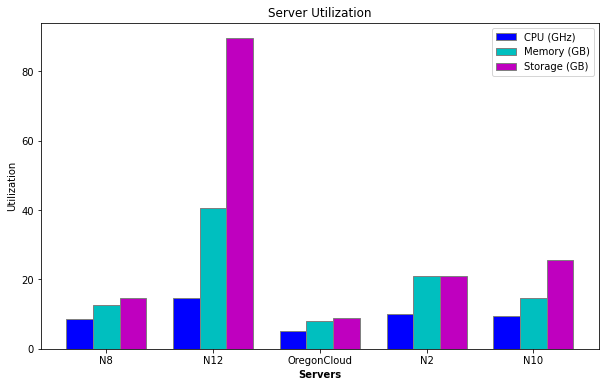

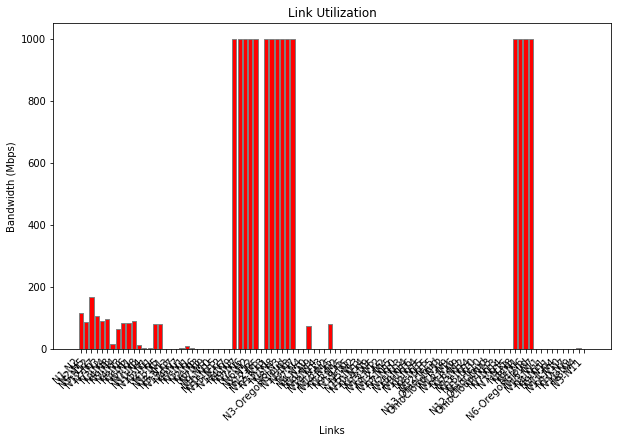

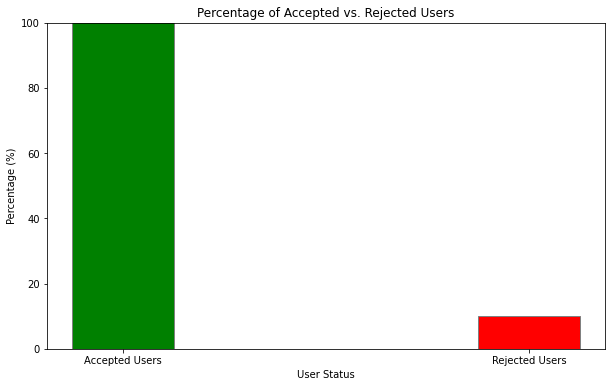

In [358]:
import matplotlib.pyplot as plt
import numpy as np


# Server Utilization Bar Graph
servers = list(server_utilization_random.keys())
cpu_util = [server_utilization_random[s]['cpu'] for s in servers]
mem_util = [server_utilization_random[s]['memory'] for s in servers]
storage_util = [server_utilization_random[s]['storage'] for s in servers]

barWidth = 0.25
r1 = np.arange(len(cpu_util))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, cpu_util, color='b', width=barWidth, edgecolor='grey', label='CPU (GHz)')
plt.bar(r2, mem_util, color='c', width=barWidth, edgecolor='grey', label='Memory (GB)')
plt.bar(r3, storage_util, color='m', width=barWidth, edgecolor='grey', label='Storage (GB)')

plt.xlabel('Servers', fontweight='bold')
plt.ylabel('Utilization')
plt.title('Server Utilization')
plt.xticks([r + barWidth for r in range(len(cpu_util))], servers)

plt.legend()
plt.show()

#**********************************************************************************************************************

# Link Utilization Bar Graph
links = list(link_utilization_random.keys())
bandwidth_util = [link_utilization_random[l] for l in links]
link_names = [f"{l[0]}-{l[1]}" for l in links]

plt.figure(figsize=(10, 6))
plt.bar(link_names, bandwidth_util, color='r', edgecolor='grey')

plt.xlabel('Links')
plt.ylabel('Bandwidth (Mbps)')
plt.title('Link Utilization')
plt.xticks(rotation=45, ha='right')
plt.show()


#**********************************************************************************************************************

# Create a new figure for Accepted and Rejected Users
y_max = 100  # Adjust this value as needed

# Create a new figure for Accepted and Rejected Users
plt.figure(figsize=(10, 6))

# Bar positions for Accepted and Rejected Users
r4 = [x + barWidth for x in r3]

user_percentages = [accepted_percentage_random, rejected_percentage_random]
user_labels = ['Accepted Users', 'Rejected Users']

# Set the bar positions at the center of the ticks
bar_positions = [r + barWidth / 2 for r in r4[:2]]

plt.bar(bar_positions, user_percentages, color=['g', 'r'], width=barWidth, edgecolor='grey')
plt.xlabel('User Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Accepted vs. Rejected Users')

# Set the x-axis ticks at the center of the bars
plt.xticks(bar_positions, user_labels)

# Set the y-axis limit slightly above 100%
plt.ylim(0, y_max)

plt.show()

# Placement using Page Rank in Descending page rank order


In [359]:
from collections import defaultdict
import random
import networkx as nx
import pandas as pd

# Initialize data structures
server_utilization_pagerank = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})
link_utilization_pagerank = defaultdict(float)
total_routing_cost_pagerank = 0.0
total_propagation_delay_pagerank = 0.0
accepted_users_count_pagerank = 0
rejected_users_count_pagerank = 0

total_edge_servers_used_pagerank = 0
total_cloud_servers_used_pagerank = 0
total_cost_pagerank = 0.0
used_edge_servers = set()
used_cloud_servers = set()


# Page Rank Weights
# Replace this with your actual PageRank data
pagerank_df = PageRank.compute_pagerank(G)
sorted_pagerank = pagerank_df.sort_values(by='value', ascending=False)

# Function to calculate a composite score for server selection
def server_score(pagerank, server_utilization):
    return pagerank - 0.01 * (server_utilization['cpu'] + server_utilization['memory'] + server_utilization['storage'])



# Function to convert string capacity to float (e.g., '3TB' to 3000.0)
def convert_capacity_to_float(capacity_str):
    if 'GHz' in capacity_str:
        return float(capacity_str.replace('GHz', ''))
    elif 'TB' in capacity_str:
        return float(capacity_str.replace('TB', '')) * 1000  # Convert TB to GB
    else:
        return float(capacity_str)

# Function to find a path that can handle the given bandwidth
def find_feasible_path(G, source, target, bandwidth):
    for path in nx.all_simple_paths(G, source=source, target=target, cutoff=50):  # cutoff is optional, for performance
        can_use_path = True
        for i in range(len(path) - 1):
            link = (path[i], path[i + 1])
            link_capacity = G[path[i]][path[i + 1]]['capacity']  # Assuming capacity is in Mbps
            if link_utilization_pagerank[link] + bandwidth > link_capacity:
                can_use_path = False
                break
        if can_use_path:
            return path
    return None

# Microservice Placement using PageRank
for app_name, users in app_to_users.items():
    
    # Sort servers by PageRank and current utilization
    #sorted_pagerank['server_score'] = sorted_pagerank.apply(lambda row: server_score(row['value'], server_utilization_pagerank[row['name']]), axis=1)
    #sorted_servers = sorted_pagerank.sort_values(by='server_score', ascending=False)['name'].tolist()

    #for server in sorted_servers:
    for _, row in sorted_pagerank.iterrows():
        server = row['name']
        
        # Get the total resource requirements for this application
        container_list = [c for c in containers_data['Containers'] if c['application'] == app_name]
        if container_list:
            containers = container_list[0]
        else:
            print(f"No containers found for the application {app_name}")
            break

        total_cpu = sum(float(c['cpu']) for c in containers['vnfs'] + containers['microservices'])
        total_mem = sum(float(c['memory']) for c in containers['vnfs'] + containers['microservices'])
        total_storage = sum(float(c['storage']) for c in containers['vnfs'] + containers['microservices'])
        
        # Check server capacity
        server_capacity = G.nodes[server]
        if server_utilization_pagerank[server]['cpu'] + total_cpu <= convert_capacity_to_float(server_capacity['cpu']) and \
           server_utilization_pagerank[server]['memory'] + total_mem <= convert_capacity_to_float(server_capacity['memory']) and \
           server_utilization_pagerank[server]['storage'] + total_storage <= convert_capacity_to_float(server_capacity['storage']):
            
            # Update server utilization
            server_utilization_pagerank[server]['cpu'] += total_cpu
            server_utilization_pagerank[server]['memory'] += total_mem
            server_utilization_pagerank[server]['storage'] += total_storage

            # Update the total number of edge/cloud servers used
            if "cloud" in server.lower():
                used_cloud_servers.add(server)
            else:
               used_edge_servers.add(server)
            break
        else:
            continue  # Move to next highest PageRank server

    # Routing and link utilization
    for user in users:
        source_node = user_to_node_map[user]
        bandwidth = G_users.nodes[user]['bandwidth']
        path = find_feasible_path(G, source=source_node, target=server, bandwidth=bandwidth)
        
        if path:
            user_propagation_delay = 0.0  # Initialize the user's total propagation delay to zero
            for i in range(len(path) - 1):
                link = (path[i], path[i + 1])
                link_utilization_pagerank[link] += bandwidth
                link_cost = bandwidth * 1e-3 * routing_cost
                #total_routing_cost_pagerank += G[path[i]][path[i + 1]]['cost']
                total_routing_cost_pagerank += link_cost
                user_propagation_delay += propagation_delays.get(link, 0)  # Assuming you have a propagation_delays dict
            
            # Add this user's propagation delay to the total
            total_propagation_delay_pagerank += user_propagation_delay
            accepted_users_count_pagerank += 1
        else:
            print(f"Could not find feasible path for user {user}")
            rejected_users_count_pagerank += 1

# Print server and link utilization
print("Server Utilization:")
for server, util in server_utilization_pagerank.items():
    continue
    print(f"Server {server}: CPU = {util['cpu']} GHz, Memory = {util['memory']} GB, Storage = {util['storage']} GB")
    
print("\nLink Utilization:")
for link, bandwidth in link_utilization_pagerank.items():
    continue
    print(f"Link {link}: {bandwidth} Mbps")

# Print total routing cost
print(f"\nTotal Routing Cost: {total_routing_cost_pagerank}")


# Print total propagation delay
print(f"\nTotal Propagation Delay: {total_propagation_delay_pagerank} ms")

# Print total accepted and rejected users
print(f"\nTotal Accepted Users: {accepted_users_count_pagerank}")
accepted_percentage_pagerank = accepted_users_count_pagerank / NoOfUsers * 100
print(f"\nPercentage of Accepted Users: {accepted_percentage_pagerank}%")

print(f"\nTotal Rejected Users: {rejected_users_count_pagerank}")
rejected_percentage_pagerank = rejected_users_count_pagerank / NoOfUsers * 100
print(f"\nPercentage of Rejected Users: {rejected_percentage_pagerank}%")

total_edge_servers_used_pagerank = len(used_edge_servers)
total_cloud_servers_used_pagerank = len(used_cloud_servers)

# Additional print statements for the counters
print(f"\nTotal Edge Servers Used: {total_edge_servers_used_pagerank}")
print(f"\nTotal Cloud Servers Used: {total_cloud_servers_used_pagerank}")

total_cost_pagerank = total_routing_cost_pagerank + total_edge_servers_used_pagerank*edge_server_cost + total_cloud_servers_used_pagerank*cloud_server_cost
print(f"\nTotal cost: {total_cost_pagerank}")


Could not find feasible path for user user_6
Server Utilization:

Link Utilization:

Total Routing Cost: 1.7483822999999974

Total Propagation Delay: 25011.925096087743 ms

Total Accepted Users: 29

Percentage of Accepted Users: 96.66666666666667%

Total Rejected Users: 1

Percentage of Rejected Users: 3.3333333333333335%

Total Edge Servers Used: 2

Total Cloud Servers Used: 0

Total cost: 201.7483823


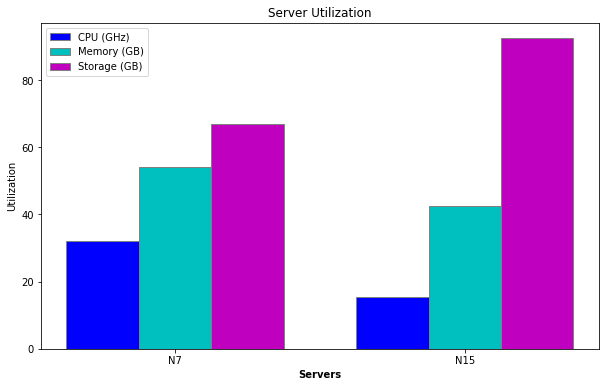

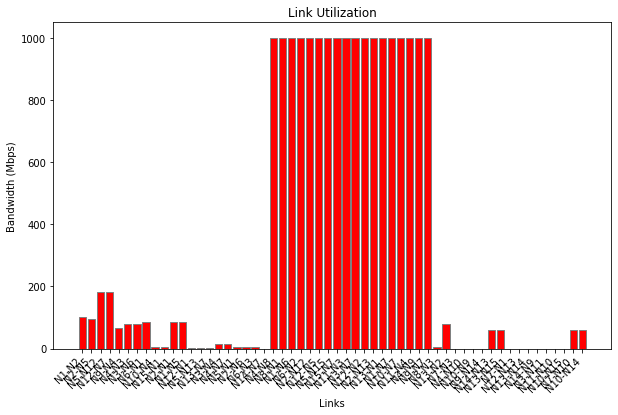

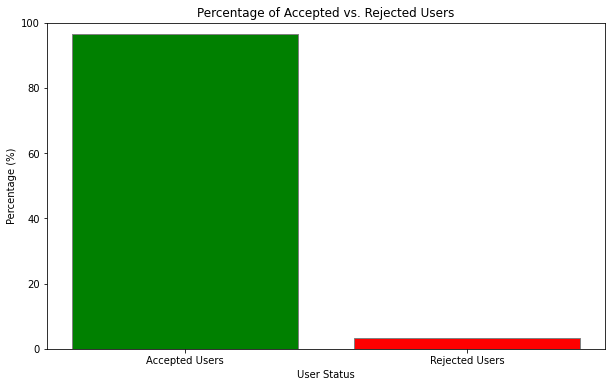

In [360]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have server_utilization, link_utilization, accepted_percentage, and rejected_percentage already defined

# Server Utilization Bar Graph
servers = list(server_utilization_pagerank.keys())
cpu_util = [server_utilization_pagerank[s]['cpu'] for s in servers]
mem_util = [server_utilization_pagerank[s]['memory'] for s in servers]
storage_util = [server_utilization_pagerank[s]['storage'] for s in servers]

barWidth = 0.25
r1 = np.arange(len(cpu_util))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, cpu_util, color='b', width=barWidth, edgecolor='grey', label='CPU (GHz)')
plt.bar(r2, mem_util, color='c', width=barWidth, edgecolor='grey', label='Memory (GB)')
plt.bar(r3, storage_util, color='m', width=barWidth, edgecolor='grey', label='Storage (GB)')

plt.xlabel('Servers', fontweight='bold')
plt.ylabel('Utilization')
plt.title('Server Utilization')
plt.xticks([r + barWidth for r in range(len(cpu_util))], servers)

plt.legend()
plt.show()

# Link Utilization Bar Graph
links = list(link_utilization_pagerank.keys())
bandwidth_util = [link_utilization_pagerank[l] for l in links]
link_names = [f"{l[0]}-{l[1]}" for l in links]

plt.figure(figsize=(10, 6))
plt.bar(link_names, bandwidth_util, color='r', edgecolor='grey')

plt.xlabel('Links')
plt.ylabel('Bandwidth (Mbps)')
plt.title('Link Utilization')
plt.xticks(rotation=45, ha='right')
plt.show()

# Accepted vs Rejected Users Bar Graph
y_max = 100  # Adjust this value as needed

plt.figure(figsize=(10, 6))

user_percentages = [accepted_percentage_pagerank, rejected_percentage_pagerank]
user_labels = ['Accepted Users', 'Rejected Users']

bar_positions = np.arange(len(user_labels))

plt.bar(bar_positions, user_percentages, color=['g', 'r'], edgecolor='grey')

plt.xlabel('User Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Accepted vs. Rejected Users')
plt.xticks(bar_positions, user_labels)
plt.ylim(0, y_max)

plt.show()


# Adaptive VNF Placement Algorithm

1. *Determining Service Order Algorithm*: This algorithm takes several parameters like sets of users, SFCs, bandwidth requirements, and computational demands and times for CNFs. It calculates the urgency and criticality for each SFC and sorts them.
2. *Placement Algorithm*: For each application in the sorted Service Order Queue, it tries to place the most critical VNF on the Central_Server. If that's not possible, it calculates a Candidate score for each node and sorts them to find the next best candidate.
3. *Experimental Setup and Results*: You have graphs for the average number of servers used, SFC length, algorithm execution time, CPU utilization, and link utilization.

In [361]:
from collections import defaultdict
import random
import networkx as nx

# Initialize data structures to hold server and link states
server_utilization_adaptive = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})
link_utilization_adaptive = defaultdict(float)
link_cost_adaptive = defaultdict(float)
total_routing_cost_adaptive = 0.0
total_propagation_delay_adaptive = 0.0
accepted_users_count_adaptive = 0
rejected_users_count_adaptive = 0

# Initialize additional counters
total_edge_servers_used_adaptive = 0
total_cloud_servers_used_adaptive = 0
total_cost_adaptive = 0.0

def convert_capacity_to_float(capacity_str):
    if 'GHz' in capacity_str:
        return float(capacity_str.replace('GHz', ''))
    elif 'TB' in capacity_str:
        return float(capacity_str.replace('TB', '')) * 1000
    else:
        return float(capacity_str)

def find_feasible_path(G, source, target, bandwidth):
    try:
        path = nx.shortest_path(G, source=source, target=target, weight='cost')
        can_use_path = all(
            link_utilization_adaptive[(path[i], path[i + 1])] + bandwidth <= G[path[i]][path[i + 1]]['capacity']
            for i in range(len(path) - 1)
        )
        if can_use_path:
            return path
    except nx.NetworkXNoPath:
        pass
    return None

def compute_link_cost(G, path, bandwidth):
    cost = 0.0
    for i in range(len(path) - 1):
        link = (path[i], path[i + 1])
        cost += bandwidth * 1e-3 * routing_cost
        link_cost_adaptive[link] += cost
    return cost

# ... (your existing code for populating G, G_users, app_to_users, user_to_node_map, containers_data, propagation_delays)

for app_name, users in app_to_users.items():
    sorted_servers = sorted(G.nodes(), key=lambda x: server_utilization_adaptive[x]['cpu'])
    
    for server in sorted_servers:
        container_list = [c for c in containers_data['Containers'] if c['application'] == app_name]
        if not container_list:
            print(f"No containers found for the application {app_name}")
            break

        containers = container_list[0]
        total_cpu = sum(float(c['cpu']) for c in containers['vnfs'] + containers['microservices'])
        total_mem = sum(float(c['memory']) for c in containers['vnfs'] + containers['microservices'])
        total_storage = sum(float(c['storage']) for c in containers['vnfs'] + containers['microservices'])
        
        server_capacity = G.nodes[server]
        if all(
            server_utilization_adaptive[server][resource] + total <= convert_capacity_to_float(server_capacity[resource])
            for resource, total in [('cpu', total_cpu), ('memory', total_mem), ('storage', total_storage)]
        ):
            for resource, total in [('cpu', total_cpu), ('memory', total_mem), ('storage', total_storage)]:
                server_utilization_adaptive[server][resource] += total
            
            # Update the total number of edge/cloud servers used
            if "cloud" in server.lower():
                total_cloud_servers_used_adaptive += 1
            else:
                total_edge_servers_used_adaptive += 1
            
            break

    for user in users:
        source_node = user_to_node_map[user]
        bandwidth = G_users.nodes[user]['bandwidth']
        path = find_feasible_path(G, source=source_node, target=server, bandwidth=bandwidth)
        
        if path:
            user_propagation_delay = 0.0
            path_cost = compute_link_cost(G, path, bandwidth)
            for i in range(len(path) - 1):
                link = (path[i], path[i + 1])
                link_utilization_adaptive[link] += bandwidth
                total_routing_cost_adaptive += bandwidth * 1e-3 * routing_cost
                user_propagation_delay += propagation_delays.get(link, 0)
            total_propagation_delay_adaptive += user_propagation_delay
            accepted_users_count_adaptive += 1
        else:
            print(f"Could not find feasible path for user {user}")
            rejected_users_count_adaptive += 1

# Additional print statements for the counters
print(f"\nTotal Edge Servers Used: {total_edge_servers_used_adaptive}")
print(f"\nTotal Cloud Servers Used: {total_cloud_servers_used_adaptive}")

total_cost_adaptive = total_routing_cost_adaptive + total_edge_servers_used_adaptive*edge_server_cost + total_cloud_servers_used_adaptive*cloud_server_cost
print(f"\nTotal cost: {total_cost_adaptive} $")

print("\nCost for Each Link:")
for link, cost in link_cost_adaptive.items():
    print(f"Link {link}: {cost} $")

print(f"\nTotal routing cost: {total_routing_cost_adaptive} $")
print(f"\nTotal Propagation Delay: {total_propagation_delay_adaptive} ms")
print(f"\nTotal Accepted Users: {accepted_users_count_adaptive}")


Could not find feasible path for user user_26

Total Edge Servers Used: 8

Total Cloud Servers Used: 0

Total cost: 800.394851555 $

Cost for Each Link:
Link ('N9', 'N7'): 0.00045 $
Link ('N7', 'N1'): 0.00225225 $
Link ('N10', 'N7'): 0.00045 $
Link ('N15', 'N1'): 0.00045 $
Link ('N2', 'N1'): 0.00045 $
Link ('N4', 'N8'): 0.011702249999999999 $
Link ('N8', 'N1'): 0.0009 $
Link ('N1', 'N2'): 6.754499999999999e-05 $
Link ('N12', 'N2'): 6.754499999999999e-05 $
Link ('N5', 'N2'): 4.545e-06 $
Link ('N2', 'N6'): 9.09e-06 $
Link ('N6', 'N3'): 1.3634999999999999e-05 $
Link ('N14', 'N7'): 4.995e-06 $
Link ('N7', 'N3'): 9.09e-06 $
Link ('N9', 'N11'): 4.545e-06 $
Link ('N11', 'N3'): 9.09e-06 $
Link ('N11', 'N4'): 0.09 $
Link ('N12', 'N7'): 0.09 $
Link ('N7', 'N4'): 0.18 $
Link ('N10', 'N4'): 0.09 $
Link ('N6', 'N2'): 0.0036180000000000006 $
Link ('N2', 'N5'): 0.005427000000000001 $
Link ('N1', 'N5'): 0.0009045000000000001 $
Link ('N8', 'N6'): 0.0013567500000000003 $
Link ('N3', 'N6'): 0.00045225000

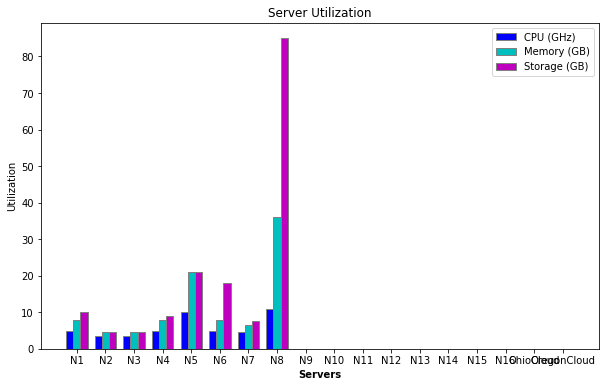

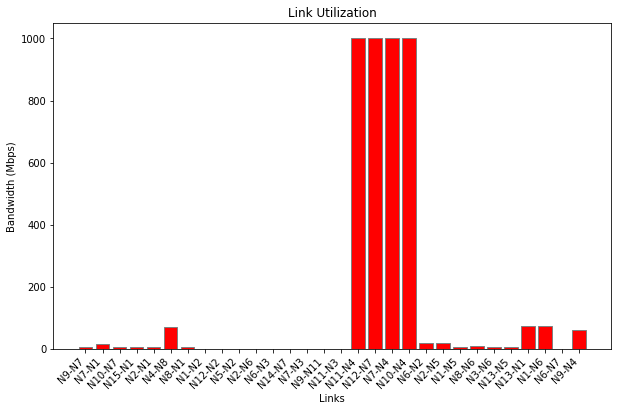

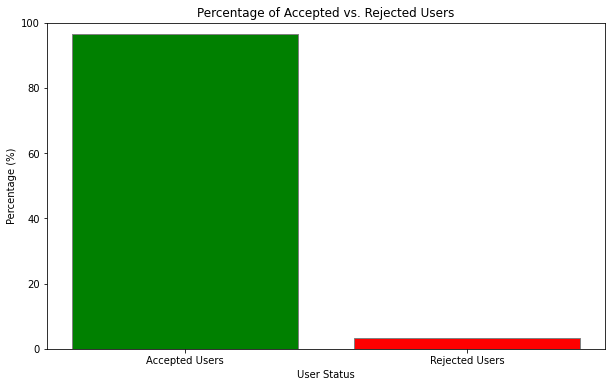

In [362]:
# Adaptive Placement Plotting

import matplotlib.pyplot as plt
import numpy as np

# Server Utilization Bar Graph
servers = list(server_utilization_adaptive.keys())
cpu_util = [server_utilization_adaptive[s]['cpu'] for s in servers]
mem_util = [server_utilization_adaptive[s]['memory'] for s in servers]
storage_util = [server_utilization_adaptive[s]['storage'] for s in servers]

barWidth = 0.25
r1 = np.arange(len(cpu_util))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, cpu_util, color='b', width=barWidth, edgecolor='grey', label='CPU (GHz)')
plt.bar(r2, mem_util, color='c', width=barWidth, edgecolor='grey', label='Memory (GB)')
plt.bar(r3, storage_util, color='m', width=barWidth, edgecolor='grey', label='Storage (GB)')

plt.xlabel('Servers', fontweight='bold')
plt.ylabel('Utilization')
plt.title('Server Utilization')
plt.xticks([r + barWidth for r in range(len(cpu_util))], servers)

plt.legend()
plt.show()

# Link Utilization Bar Graph
links = list(link_utilization_adaptive.keys())
bandwidth_util = [link_utilization_adaptive[l] for l in links]
link_names = [f"{l[0]}-{l[1]}" for l in links]

plt.figure(figsize=(10, 6))
plt.bar(link_names, bandwidth_util, color='r', edgecolor='grey')

plt.xlabel('Links')
plt.ylabel('Bandwidth (Mbps)')
plt.title('Link Utilization')
plt.xticks(rotation=45, ha='right')
plt.show()

# Accepted vs Rejected Users Bar Graph
y_max = 100  # Adjust this value as needed

accepted_percentage_adaptive = (accepted_users_count_adaptive / NoOfUsers) * 100
rejected_percentage_adaptive = (rejected_users_count_adaptive / NoOfUsers) * 100

plt.figure(figsize=(10, 6))

user_percentages = [accepted_percentage_adaptive, rejected_percentage_adaptive]
user_labels = ['Accepted Users', 'Rejected Users']

bar_positions = np.arange(len(user_labels))

plt.bar(bar_positions, user_percentages, color=['g', 'r'], edgecolor='grey')

plt.xlabel('User Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Accepted vs. Rejected Users')
plt.xticks(bar_positions, user_labels)
plt.ylim(0, y_max)

plt.show()


# Combined Plots for Random Placement, Page Rank Placement and Adaptive Placement Algorithms

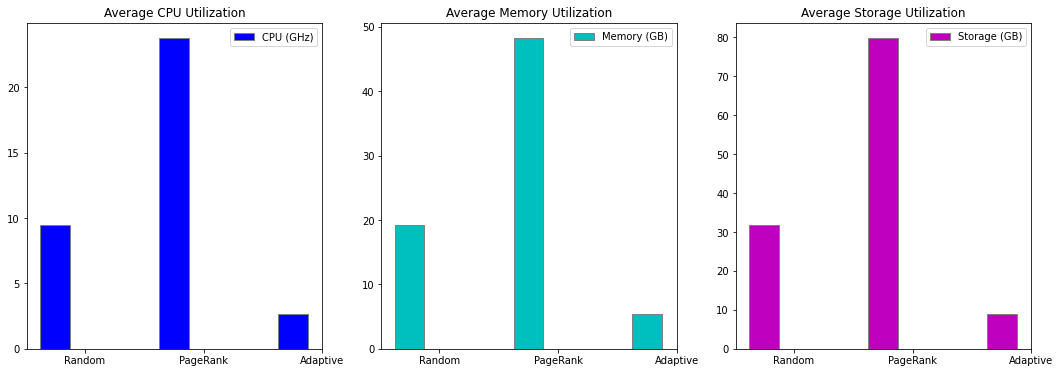

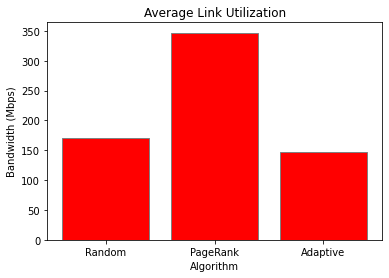

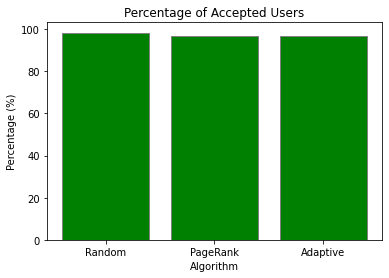

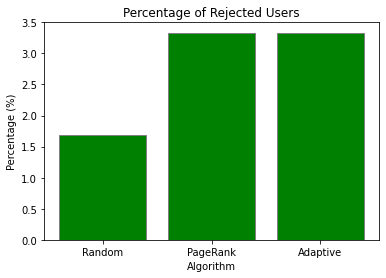

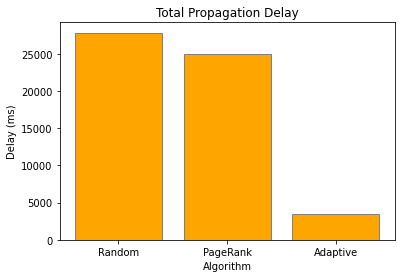

<Figure size 432x288 with 0 Axes>

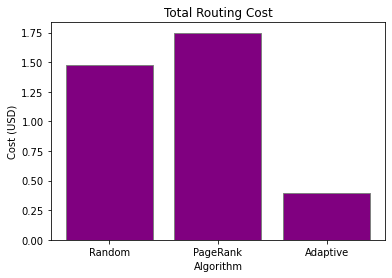

<Figure size 432x288 with 0 Axes>

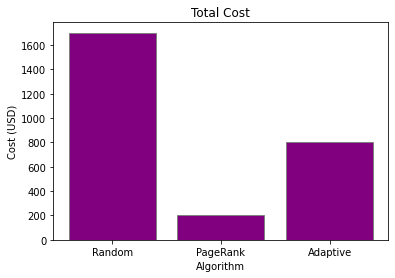

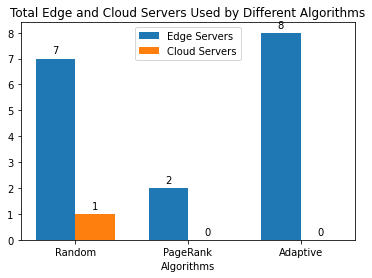

Edge Servers Used (Random):  7
Cloud Servers Used (Random):  1


In [363]:
import matplotlib.pyplot as plt
import numpy as np

# Server Utilization Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Assuming you have server_utilization_adaptive, server_utilization_pagerank, server_utilization_random
server_labels = ['Random', 'PageRank', 'Adaptive']

# CPU Utilization
cpu_util = [
    np.mean([server_utilization_random[s]['cpu'] for s in server_utilization_random]),
    np.mean([server_utilization_pagerank[s]['cpu'] for s in server_utilization_pagerank]),
    np.mean([server_utilization_adaptive[s]['cpu'] for s in server_utilization_adaptive])
]

# Memory Utilization
mem_util = [
    np.mean([server_utilization_random[s]['memory'] for s in server_utilization_random]),
    np.mean([server_utilization_pagerank[s]['memory'] for s in server_utilization_pagerank]),
    np.mean([server_utilization_adaptive[s]['memory'] for s in server_utilization_adaptive])
]

# Storage Utilization
storage_util = [
    np.mean([server_utilization_random[s]['storage'] for s in server_utilization_random]),
    np.mean([server_utilization_pagerank[s]['storage'] for s in server_utilization_pagerank]),
    np.mean([server_utilization_adaptive[s]['storage'] for s in server_utilization_adaptive])
]

barWidth = 0.25
r1 = np.arange(len(cpu_util))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#*********************************************************************************************************************************************
# Plotting CPU Utilization
axs[0].bar(r1, cpu_util, color='b', width=barWidth, edgecolor='grey', label='CPU (GHz)')
axs[0].set_title('Average CPU Utilization')
axs[0].set_xticks([r + barWidth for r in range(len(cpu_util))])
axs[0].set_xticklabels(server_labels)
axs[0].legend()
#*********************************************************************************************************************************************
# Plotting Memory Utilization
axs[1].bar(r1, mem_util, color='c', width=barWidth, edgecolor='grey', label='Memory (GB)')
axs[1].set_title('Average Memory Utilization')
axs[1].set_xticks([r + barWidth for r in range(len(mem_util))])
axs[1].set_xticklabels(server_labels)
axs[1].legend()
#*********************************************************************************************************************************************
# Plotting Storage Utilization
axs[2].bar(r1, storage_util, color='m', width=barWidth, edgecolor='grey', label='Storage (GB)')
axs[2].set_title('Average Storage Utilization')
axs[2].set_xticks([r + barWidth for r in range(len(storage_util))])
axs[2].set_xticklabels(server_labels)
axs[2].legend()

plt.show()

#*********************************************************************************************************************************************
# Plotting Link Utilization
plt.figure()
avg_link_util = [
    np.mean(list(link_utilization_random.values())),
    np.mean(list(link_utilization_pagerank.values())),
    np.mean(list(link_utilization_adaptive.values()))
]

plt.bar(server_labels, avg_link_util, color='r', edgecolor='grey')
plt.title('Average Link Utilization')
plt.xlabel('Algorithm')
plt.ylabel('Bandwidth (Mbps)')
plt.show()

#*********************************************************************************************************************************************

# Plotting % of Accepted Users
plt.figure()
accepted_users_percentage = [
    (accepted_users_count_random / (accepted_users_count_random + rejected_users_count_random)) * 100 if accepted_users_count_random + rejected_users_count_random > 0 else 0,
    (accepted_users_count_pagerank / (accepted_users_count_pagerank + rejected_users_count_pagerank)) * 100 if accepted_users_count_pagerank + rejected_users_count_pagerank > 0 else 0,
    (accepted_users_count_adaptive / (accepted_users_count_adaptive + rejected_users_count_adaptive)) * 100 if accepted_users_count_adaptive + rejected_users_count_adaptive > 0 else 0
]

plt.bar(server_labels, accepted_users_percentage, color='g', edgecolor='grey')
plt.title('Percentage of Accepted Users')
plt.xlabel('Algorithm')
plt.ylabel('Percentage (%)')
plt.show()

#*********************************************************************************************************************************************

# Plotting % of Rejected Users
plt.figure()
rejected_users_percentage = [
    (rejected_users_count_random / (accepted_users_count_random + rejected_users_count_random)) * 100 if accepted_users_count_random + rejected_users_count_random > 0 else 0,
    (rejected_users_count_pagerank / (accepted_users_count_pagerank + rejected_users_count_pagerank)) * 100 if accepted_users_count_pagerank + rejected_users_count_pagerank > 0 else 0,
    (rejected_users_count_adaptive / (accepted_users_count_adaptive + rejected_users_count_adaptive)) * 100 if accepted_users_count_adaptive + rejected_users_count_adaptive > 0 else 0
]

plt.bar(server_labels, rejected_users_percentage, color='g', edgecolor='grey')
plt.title('Percentage of Rejected Users')
plt.xlabel('Algorithm')
plt.ylabel('Percentage (%)')
plt.show()

#*********************************************************************************************************************************************
# New Plot for Total Propagation Delay
plt.figure()
total_propagation_delay_values = [
    total_propagation_delay_random,
    total_propagation_delay_pagerank,
    total_propagation_delay_adaptive
]

plt.bar(server_labels, total_propagation_delay_values, color='orange', edgecolor='grey')
plt.title('Total Propagation Delay')
plt.xlabel('Algorithm')
plt.ylabel('Delay (ms)')
plt.show()


#*********************************************************************************************************************************************

# New Plot for Total Routing Cost
plt.figure()
total_routing_cost_values = [
    total_routing_cost_random,
    total_routing_cost_pagerank,
    total_routing_cost_adaptive
]

fig, ax = plt.subplots()
ax.bar(server_labels, total_routing_cost_values, color='purple', edgecolor='grey')

plt.title('Total Routing Cost')
plt.xlabel('Algorithm')
plt.ylabel('Cost (USD)')
plt.show()
#*********************************************************************************************************************************************

#Plot for total cost

plt.figure()
total_cost_values = [
    total_cost_random,
    total_cost_pagerank,
    total_cost_adaptive
]

fig, ax = plt.subplots()
ax.bar(server_labels, total_cost_values, color='purple', edgecolor='grey')

plt.title('Total Cost')
plt.xlabel('Algorithm')
plt.ylabel('Cost (USD)')
plt.show()

#*********************************************************************************************************************************************

# Data
algorithms = ['Random', 'PageRank', 'Adaptive']
edge_servers = [
    total_edge_servers_used_random,
    total_edge_servers_used_pagerank,
    total_edge_servers_used_adaptive
]
cloud_servers = [
    total_cloud_servers_used_random,
    total_cloud_servers_used_pagerank,
    total_cloud_servers_used_adaptive
]

# Set up the bar chart
x = np.arange(len(algorithms))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, edge_servers, width, label='Edge Servers')
rects2 = ax.bar(x + width/2, cloud_servers, width, label='Cloud Servers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Algorithms')
ax.set_title('Total Edge and Cloud Servers Used by Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Autolabel function to display the label on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


print("Edge Servers Used (Random): ", total_edge_servers_used_random)
print("Cloud Servers Used (Random): ", total_cloud_servers_used_random)




# GAMS Connection


In [364]:
import subprocess

def run_gams_model(gams_path, model_file, log_option, output_gdx):
    """
    Run a GAMS model using Python.

    Parameters:
    gams_path (str): Full path to the GAMS executable.
    model_file (str): The GAMS model file to run.
    log_option (str): Log level option for GAMS.
    input_gdx (str): GDX file for input data.
    output_gdx (str): GDX file for output data.
    """

    # Construct the command to run the GAMS model
    command = f'"{gams_path}" {model_file} lo={log_option} gdx={output_gdx}'

    # Run the command and capture output
    try:
        completed_process = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print("GAMS model executed successfully.")
        print(completed_process.stdout.decode())
        print(completed_process.stderr.decode())
    except subprocess.CalledProcessError as e:
        print("An error occurred in GAMS model execution.")
        print(e)
        print(e.stdout.decode())
        print(e.stderr.decode())

# Path to your GAMS installation
gams_path = 'C:\\GAMS\\win64\\24.9\\gams'

# Your GAMS model file
model_file = 'm2'

# Define the path to your input GDX file
input_gdx = 'Optimization_input.gdx'

# Log option and output GDX file name
log_option = '3'
output_gdx = 'Optimization_output'

# Run the GAMS model
run_gams_model(gams_path, model_file, log_option, output_gdx)


GAMS model executed successfully.
--- Job m2 Start 11/28/23 11:14:20 24.9.1 r63795 WEX-WEI x86 64bit/MS Windows
GAMS 24.9.1   Copyright (C) 1987-2017 GAMS Development. All rights reserved
Licensee: Mohamad Awad                                   G151015:1146AO-GEN
          Kuwait University, Computer Engineering                   DC12067
          License for teaching and research at degree granting institutions
--- Starting compilation
--- m2.gms(35) 2 Mb
--- GDXin=c:\Users\youse\Documents\GitHub\VNF-python\Optimization_input.gdx
--- m2.gms(156) 3 Mb
--- Starting execution: elapsed 0:00:00.008
--- m2.gms(2) 4 Mb
--- Generating MIP model VNFs_Placement
--- m2.gms(114) 13 Mb
---   2,105 rows  73,261 columns  82,171 non-zeroes
---   1,260 discrete-columns
--- Executing CPLEX: elapsed 0:00:00.279

IBM ILOG CPLEX   24.9.1 r63795 Released Aug 30, 2017 WEI x86 64bit/MS Windows 
--- GAMS/Cplex licensed for continuous and discrete problems.
Cplex 12.7.1.0

Reading data...
Starting Cplex...
Spa

# Create Test GDX File

In [365]:
import sys
# Add the GAMS Python API path to sys.path
gams_api_path = "C:\\GAMS\\win64\\24.9\\apifiles\\Python\\api_36"
sys.path.append(gams_api_path)
from gams import *


# Initialize GAMS workspace and database
ws = GamsWorkspace()
db = ws.add_database()

# Example data (replace with your actual data)
apps_data = ['App1', 'App2', 'App3']
app_definition_data = {(1, 'App1'): 1, (2, 'App2'): 1, (3, 'App3'): 1}  # Assuming (VNF, App): Value format
bw_req_data = {'App1': 100, 'App2': 200, 'App3': 300}

# Create GAMS sets and parameters
apps_set = db.add_set('Apps', 1, 'Set of IoT Apps')
app_def_param = db.add_parameter_dc('App_Definition', [apps_set], 'VNFs -> Apps relation')
bw_req_param = db.add_parameter('BW_Req', 1, 'Bandwidth Requirement')

# Populate data
for app in apps_data:
    apps_set.add_record(app)

for (vnf, app), val in app_definition_data.items():
    app_def_param.add_record(app).value = val

for app, bw in bw_req_data.items():
    bw_req_param.add_record(app).value = bw

# Write to GDX file
gdx_filename = 'Optimization_input.gdx'
db.export(gdx_filename)

print(f'GDX file created: {gdx_filename}')


GDX file created: Optimization_input.gdx


# Create json File - Raw

In [366]:
import json
import networkx as nx

# Assuming your data (G, G_users, app_to_users, containers_data) is already loaded or computed
# For demonstration, these will be empty or simple structures
# G = nx.Graph()
# G_users = nx.Graph()
# app_to_users = {}  # Example: {'App1': ['User1', 'User2'], 'App2': ['User3']}
# containers_data = {}  # Example: {'Containers': [{'application': 'App1', 'vnfs': [{'name': 'VNF1'}]}]}

# Step 1: Extract data
# Extract Apps and Users
apps = list(app_to_users.keys())
users = list(G_users.nodes)

# Extract Servers and VNFs
servers = list(G.nodes)
vnfs = set()  # To avoid duplicates
for container in containers_data.get('Containers', []):
    for vnf in container.get('vnfs', []):
        vnfs.add(vnf['name'])

# Step 2: Format data for GAMS
# Convert to GAMS-friendly format (e.g., lists, dictionaries)

# Example: Create a dictionary for App_Definition
app_definition = {}
for app, vnf_list in app_to_users.items():
    for vnf in vnf_list:
        app_definition[(vnf, app)] = 1  # or other relevant value

# Initialize a new dictionary for the adjusted structure
app_definition_adjusted = {}

# Loop through the original app_definition dictionary
for key, value in app_definition.items():
    user, app = key  # Unpack the tuple
    if user not in app_definition_adjusted:
        app_definition_adjusted[user] = {}
    app_definition_adjusted[user][app] = value

# Step 3: Write data to a file (GDX or text)
# For simplicity, we'll write to a JSON file (GDX writing requires GAMS Python API)

data_for_gams = {
    'Apps': apps,
    'Users': users,
    'Servers': servers,
    'VNFs': list(vnfs),
    'AppDefinition': app_definition_adjusted
    # Add other parameters as needed
}

# Function to convert tuple keys to string keys
def convert_tuple_keys_to_string(data):
    new_data = {}
    for key, value in data.items():
        if isinstance(key, tuple):
            # Convert the tuple to a string, e.g., "('user_0', 'City Surveillance')" 
            string_key = str(key)  
        else:
            string_key = key
        new_data[string_key] = value
    return new_data

def convert_tuple_keys_to_strings(data):
    if isinstance(data, dict):
        return {str(key): convert_tuple_keys_to_strings(value) for key, value in data.items()}
    return data


# Convert the tuple keys in your data dictionary
data_for_gams_converted = {k: convert_tuple_keys_to_string(v) if isinstance(v, dict) else v for k, v in data_for_gams.items()}

# Write the converted data to a JSON file
with open('data_for_gams_converted.json', 'w') as f:
    json.dump(data_for_gams_converted, f, indent=4)

# Note: You'll need to read this JSON in GAMS or use the GAMS Python API to create a GDX file

# Continue from the previous code

# Step 4: Additional data processing for GAMS parameters


def get_user_ap(user, G_users):
    # Retrieve the associated AP for the user from the graph
    return G_users.nodes[user].get('associated_ap')  # Replace 'associated_ap' with the actual attribute name

def get_server_capacity(server, G):
    # Retrieve the capacity of the server from the graph
    return G.nodes[server].get('capacity')  # Replace 'capacity' with the actual attribute name

def get_link_delay(u, v, G):
    # Retrieve the delay of the link from the graph
    return G[u][v].get('delay')  # Replace 'delay' with the actual attribute name


# Example: Users_AP and Users_App
users_ap = {}
users_app = {}
for user in users:
    # Assuming function get_user_ap returns the associated AP for the user
    ap = get_user_ap(user, G_users)  # Replace with actual function/logic
    app = G_users.nodes[user]['application']  # Replace with actual data structure
    users_ap[(user, ap)] = 1  # Indicates user is connected to this AP
    users_app[(user, app)] = 1  # Indicates user is using this app

# Example: HostUtilizationCap
host_utilization_cap = {}
for server in servers:
    # Assuming function get_server_capacity returns the capacity for the server
    capacity = get_server_capacity(server, G)  # Replace with actual function/logic
    host_utilization_cap[server] = capacity  # Replace with actual value



# Example: Topology and LinkDelay
topology = {}
link_delay = {}
for u, v in G.edges:
    topology[(u, v)] = 1  # Example: 1 indicates a link exists
    # Assuming function get_link_delay returns the delay for the link
    delay = get_link_delay(u, v, G)  # Replace with actual function/logic
    link_delay[(u, v)] = delay

# Adjusting Users_AP
users_ap_adjusted = {}
for key, value in users_ap.items():
    user, ap = key
    if user not in users_ap_adjusted:
        users_ap_adjusted[user] = {}
    users_ap_adjusted[user][ap] = value

# Adjusting Users_App
users_app_adjusted = {}
for key, value in users_app.items():
    user, app = key
    if user not in users_app_adjusted:
        users_app_adjusted[user] = {}
    users_app_adjusted[user][app] = value

# Adjusting Topology
topology_adjusted = {}
for key, value in topology.items():
    u, v = key
    topology_adjusted[f"{u}-{v}"] = value  # Concatenate with a delimiter

# Adjusting LinkDelay
link_delay_adjusted = {}
for key, value in link_delay.items():
    u, v = key
    #link_delay_adjusted[f"{u}-{v}"] = value  # Concatenate with a delimiter
    #link_delay_adjusted[f"{u}-{v}"] = 100  # Concatenate with a delimiter
    link_delay_adjusted = {f"{u}-{v}": propagation_delays.get((u, v)) for u, v in G.edges()}




# Step 5: Add additional data to the dictionary for GAMS
data_for_gams.update({
    'Users_AP': users_ap_adjusted,
    'Users_App': users_app_adjusted,
    'HostUtilizationCap': host_utilization_cap,
    'Topology': topology_adjusted,
    'LinkDelay': link_delay_adjusted
    # Add other parameters as needed
})

# Set the host utilization capacity to 100 for each server
for server in data_for_gams['HostUtilizationCap'].keys():
    data_for_gams['HostUtilizationCap'][server] = 100


# Convert tuple keys to strings in the data_for_gams dictionary
data_for_gams_converted = convert_tuple_keys_to_strings(data_for_gams)

# Write the converted data to the JSON file
# Convert the data_for_gams dictionary to JSON
with open('data_for_gams_converted.json', 'w') as f:
    json.dump(data_for_gams, f, indent=4)


# Note: The functions get_user_ap, get_server_capacity, and get_link_delay are placeholders
# and should be replaced with your actual data retrieval logic.


# Read json file

In [372]:
import json
from gams import *
import os
import csv

# Load the JSON data
with open('data_for_gams_converted.json', 'r') as f:
    data = json.load(f)

# Initialize a GAMS workspace
ws = GamsWorkspace()

# Create a new GAMS database
db = ws.add_database()

# Function to add sets to the database
def add_set_to_db(db, set_name, data_list, dimension=1):
    gams_set = db.add_set(set_name, dimension)
    for item in data_list:
        gams_set.add_record(item)

# Function to add parameters to the database
def add_param_to_db(db, param_name, data_dict, dimension, default_value=0):
    param = db.add_parameter(param_name, dimension)

    for key, value in data_dict.items():
        if isinstance(value, dict):
            # Handle two-dimensional data
            for inner_key, inner_value in value.items():
                indices = [str(key).strip(), str(inner_key).strip()]
                param.add_record(indices).value = inner_value
        else:
            # Handle single-dimensional data
            indices = [str(key).strip()]
            param.add_record(indices).value = value







# Add sets
add_set_to_db(db, 'Apps', data['Apps'])
add_set_to_db(db, 'Users', data['Users'])
add_set_to_db(db, 'Servers', data['Servers'])
add_set_to_db(db, 'VNFs', data['VNFs'])

# Add parameters with the correct dimensions
add_param_to_db(db, 'Users_AP', data['Users_AP'], 2)  # 2-dimensional
add_param_to_db(db, 'Users_App', data['Users_App'], 2)  # 2-dimensional
add_param_to_db(db, 'HostUtilizationCap', data['HostUtilizationCap'], 1)  # 1-dimensional
add_param_to_db(db, 'Topology', data['Topology'], 1)  # 1-dimensional
add_param_to_db(db, 'LinkDelay', data['LinkDelay'], 1)  # 1-dimensional
# ... and so on for other parameters



# Export the database to a GDX file
# Specify a full path for the GDX file, for example:
gdx_file_path = "C:\\Users\\youse\\Documents\\Github\\VNF-python\\data.gdx"  # Change this to a valid path on your system

# Check the current working directory
print("Current Working Directory:", os.getcwd())

# Try to export and catch any exceptions
try:
    db.export(gdx_file_path)
    print(f"GDX file created successfully at: {gdx_file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

# Function to write the database contents to a CSV file
def export_db_to_csv(db, csv_file_path):
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as file:
        csv_writer = csv.writer(file)
        for symbol in db:
            if isinstance(symbol, GamsSet):
                csv_writer.writerow(['Set:', symbol.name])
                for rec in symbol:
                    csv_writer.writerow([rec.keys[0]])
            elif isinstance(symbol, GamsParameter):
                csv_writer.writerow(['Parameter:', symbol.name])
                for rec in symbol:
                    row = [key for key in rec.keys] + [rec.value]
                    csv_writer.writerow(row)
            csv_writer.writerow([])  # Add a blank line between symbols

# Specify a full path for the CSV file
csv_file_path = "C:\\Users\\youse\\Documents\\Github\\VNF-python\\data.csv"  # Change this to a valid path on your system

# Try to export and catch any exceptions
try:
    export_db_to_csv(db, csv_file_path)
    print(f"CSV file created successfully at: {csv_file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


Current Working Directory: c:\Users\youse\Documents\GitHub\VNF-python
GDX file created successfully at: C:\Users\youse\Documents\Github\VNF-python\data.gdx
An error occurred: name 'csv' is not defined
